# Temperature Prediction

In this project we are going to findout that **Linear Regression** is suitable for predicting **Temperature** or NOT?

Follow me step by step.

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# 2. Import Data

In [2]:
df = pd.read_csv("data/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# 3. Exploratory Data Anaysis

In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
print("sum of Nan values: ",df.isna().sum())
print("data frame with Nan shape: ",df[df.isna().any(axis=1)].shape)

sum of Nan values:  Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
data frame with Nan shape:  (517, 12)


Now the Nan values will be removed:

In [5]:
df = df.dropna()
df.isna().sum()
print("data frame with Nan shape: ",df[df.isna().any(axis=1)].shape)

data frame with Nan shape:  (0, 12)


In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Now the unnecessary columns will be removed like "Loud Cover" because its zero in all rows and "Formatted Date","Summary",	"Precip Type","Daily Summary" becasue these are not numeric data.

In [8]:
df = df.drop(["Formatted Date","Summary","Precip Type","Loud Cover","Daily Summary"],axis=1)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# 4. Visualisation

E:\anaconda\envs\Training\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\envs\Training\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\envs\Training\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\envs\Training\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

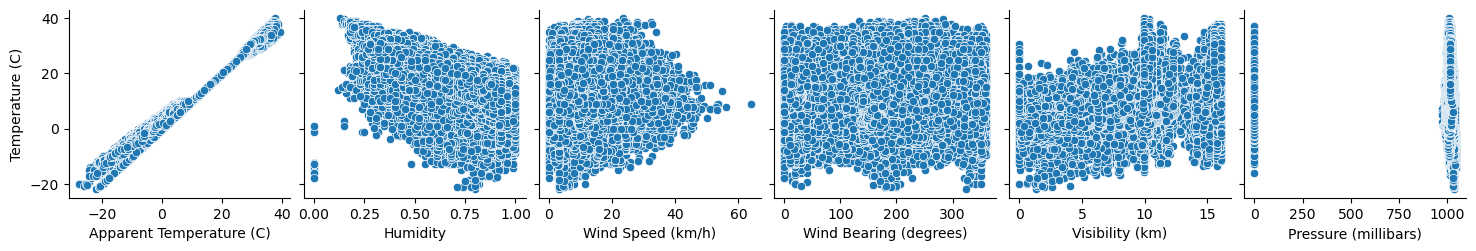

In [9]:
X_cols = ["Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]
y_cols = ["Temperature (C)"]
sns.pairplot(df,x_vars= X_cols,y_vars= y_cols);

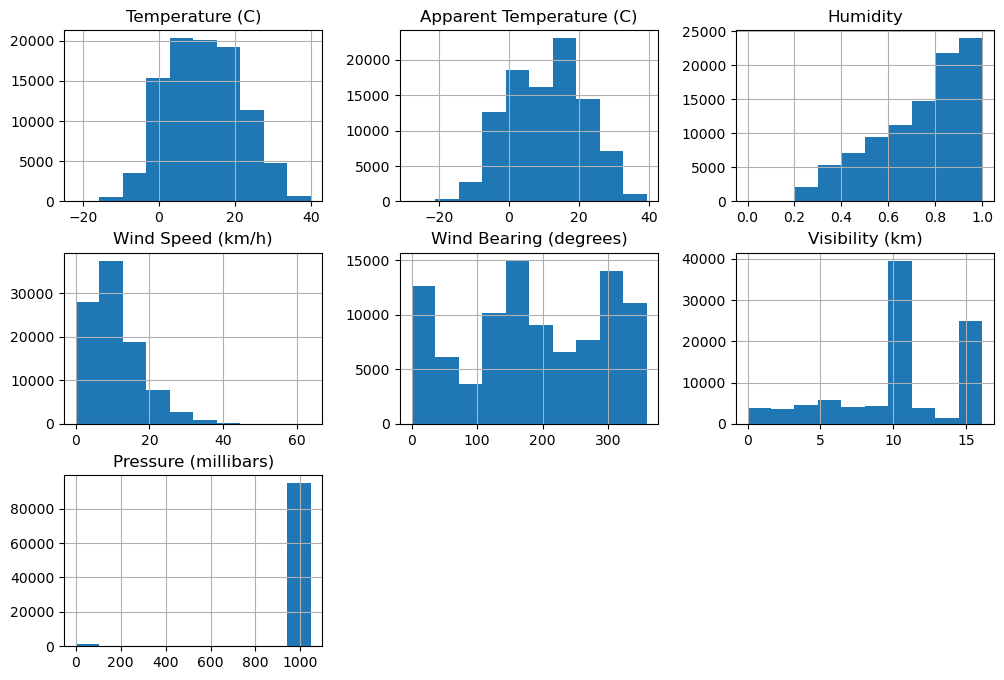

In [10]:
df.hist(linewidth=1.2, figsize=(12,8));

Now our data will be scaled with standard scale: 

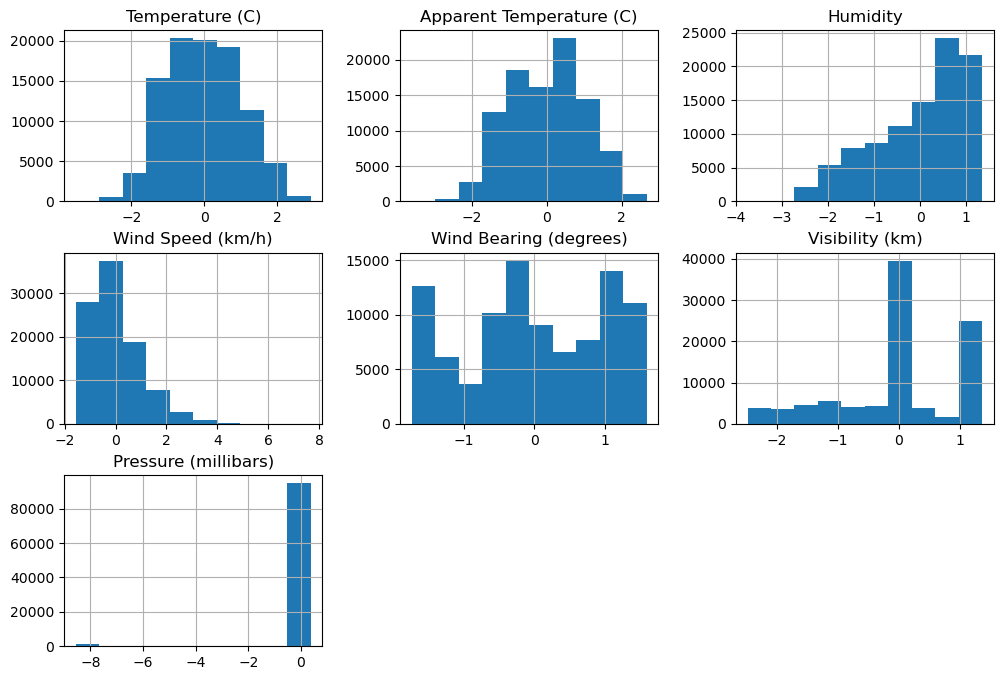

In [11]:
from sklearn.preprocessing import StandardScaler
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
scaled_df.hist(linewidth=1.2, figsize=(12,8));

Now the Correlation matirx of Scaled data frame is shown here:

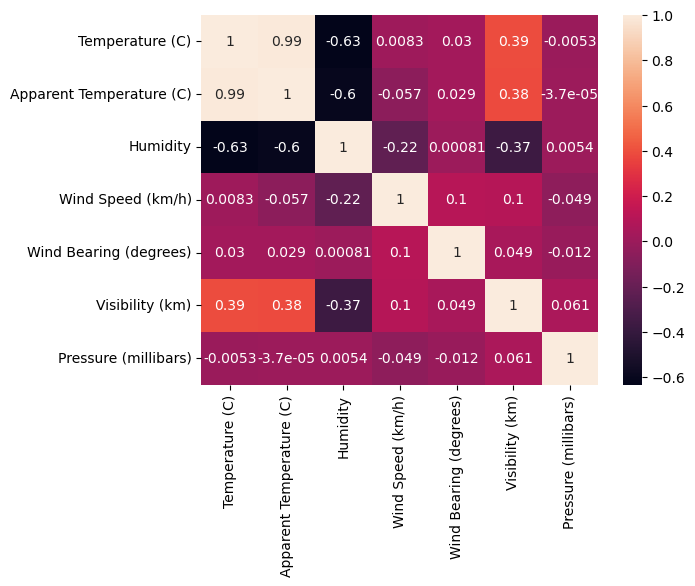

In [12]:
sns.heatmap(scaled_df.corr(),annot=True);

Its clear thet there is poor correlation between variables.

# 5. Data Selection

In [13]:
X = scaled_df[['Humidity','Apparent Temperature (C)',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]
y = scaled_df["Temperature (C)"].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 6. Applying Different Algorithms

## 6.1 Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

print("linear regression Coef:",lr.coef_)
print("linear regression Intercept:",lr.intercept_)


linear regression Coef: [-0.02930612  0.97734961  0.05790395 -0.00423411  0.00375185 -0.00267678]
linear regression Intercept: 5.060570429645569e-05


## 6.2 Robust Regression

This model is more robust to outliers.
This model creates inlier and outlier sets and perform a linear regression on the best inlier set.

In [16]:
from sklearn.linear_model import RANSACRegressor

In [17]:
ransac = RANSACRegressor(random_state=42)
ransac.fit(X_train,y_train)

print("linear regression Coef:",ransac.estimator_.coef_)
print("linear regression Intercept:",ransac.estimator_.intercept_)

linear regression Coef: [-0.02642645  0.98359845  0.07080381 -0.00118316  0.00134099 -0.00290635]
linear regression Intercept: 0.004451754536409369


## 6.3 Regularised Method
**Ridge** ,**Lasso** and **Elastic Net**are Regularised Methods. 

All of them have some paraneters that we have to deal with (like $\alpha$). So we will use Validation Curve.

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import validation_curve

### 6.3.1 Ridge

In [19]:
np.random.seed(42)
param_name = "alpha"
param_range = np.logspace(-6,5,10)

train_scores_ridge , test_scores_ridge = validation_curve(estimator=Ridge(),
                                                          X=X_train,y=y_train,
                                                          param_name=param_name,param_range=param_range)
train_mean_ridge = np.mean(train_scores_ridge, axis=1)
train_std_ridge = np.std(train_scores_ridge, axis=1)

test_mean_ridge = np.mean(test_scores_ridge, axis=1)
test_std_ridge = np.std(test_scores_ridge, axis=1)
train_scores_ridge

array([[0.99013096, 0.99019734, 0.99015364, 0.99015962, 0.99018507],
       [0.99013096, 0.99019734, 0.99015364, 0.99015962, 0.99018507],
       [0.99013096, 0.99019734, 0.99015364, 0.99015962, 0.99018507],
       [0.99013096, 0.99019734, 0.99015364, 0.99015962, 0.99018507],
       [0.99013096, 0.99019734, 0.99015364, 0.99015962, 0.99018507],
       [0.99013095, 0.99019734, 0.99015364, 0.99015961, 0.99018507],
       [0.99013075, 0.99019713, 0.99015343, 0.99015941, 0.99018487],
       [0.99007493, 0.99014179, 0.99009764, 0.99010409, 0.99012938],
       [0.97960445, 0.9797574 , 0.97963841, 0.97972264, 0.97970755],
       [0.68350143, 0.68522312, 0.68462821, 0.68480727, 0.68398759]])

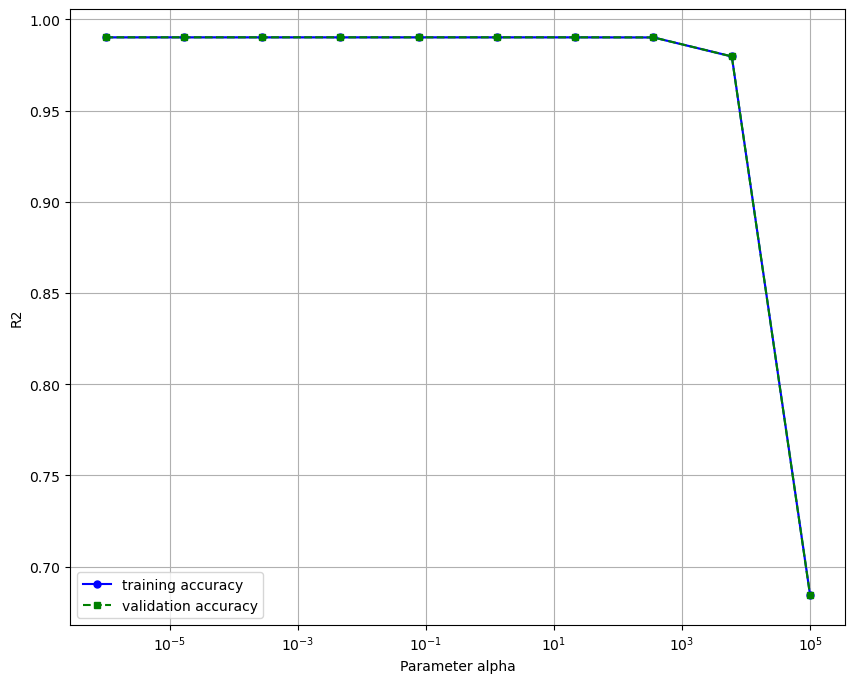

In [20]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean_ridge,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_ridge + train_std_ridge,
                 train_mean_ridge - train_std_ridge, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_ridge,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean_ridge + test_std_ridge,
                 test_mean_ridge - test_std_ridge,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')

plt.show()

For Ridge i set $\alpha$ =$10^1$ 

In [21]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)

ridge_model.coef_

array([-0.02943381,  0.97712534,  0.05784913, -0.00422342,  0.0037952 ,
       -0.00268133])

### 6.3.2 Lasso

In [22]:
train_scores_lasso , test_scores_lasso = validation_curve(estimator=Lasso(),
                                                          X=X_train,y=y_train,
                                                          param_name=param_name,param_range=param_range)

train_mean_lasso = np.mean(train_scores_lasso, axis=1)
train_std_lasso = np.std(train_scores_lasso, axis=1)

test_mean_lasso = np.mean(test_scores_lasso, axis=1)
test_std_lasso = np.std(test_scores_lasso, axis=1)

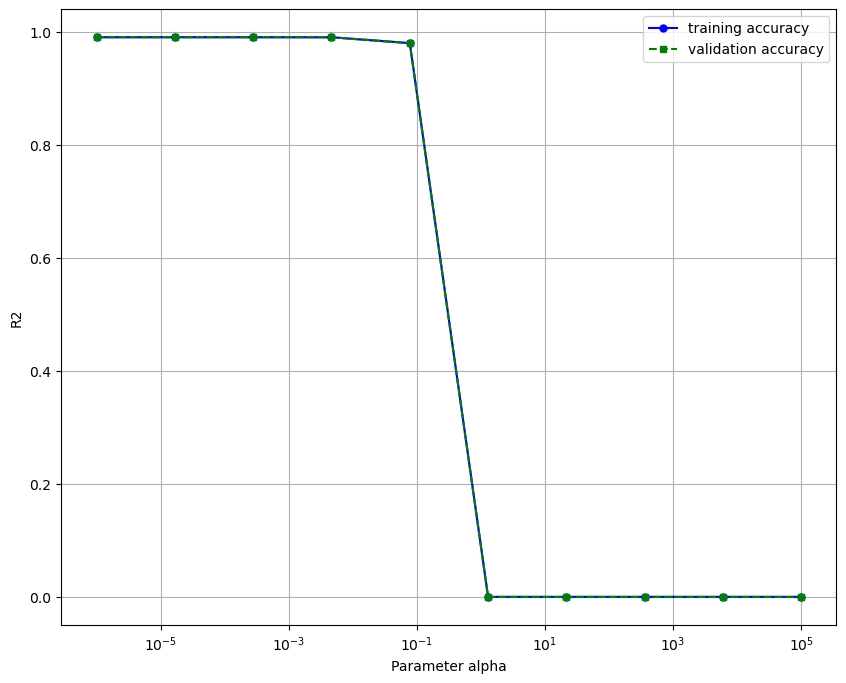

In [23]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean_lasso,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_lasso + train_std_lasso,
                 train_mean_lasso - train_std_lasso, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_lasso,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean_lasso + test_std_lasso,
                 test_mean_lasso - test_std_lasso,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')

plt.show()

For Lasso i set $\alpha$ =$10^{-3}$ 

In [24]:
lasso_model = Lasso(alpha=0.00001)
lasso_model.fit(X_train,y_train)

lasso_model.coef_

array([-0.02932112,  0.97733417,  0.05789006, -0.00422142,  0.00374241,
       -0.00266678])

### 6.3.3 Elastic Net

In [25]:
train_scores_elastic , test_scores_elastic = validation_curve(estimator=ElasticNet(),
                                                          X=X_train,y=y_train,
                                                          param_name=param_name,param_range=param_range)

train_mean_elastic = np.mean(train_scores_elastic, axis=1)
train_std_elastic = np.std(train_scores_elastic, axis=1)

test_mean_elastic = np.mean(test_scores_elastic, axis=1)
test_std_elastic = np.std(test_scores_elastic, axis=1)

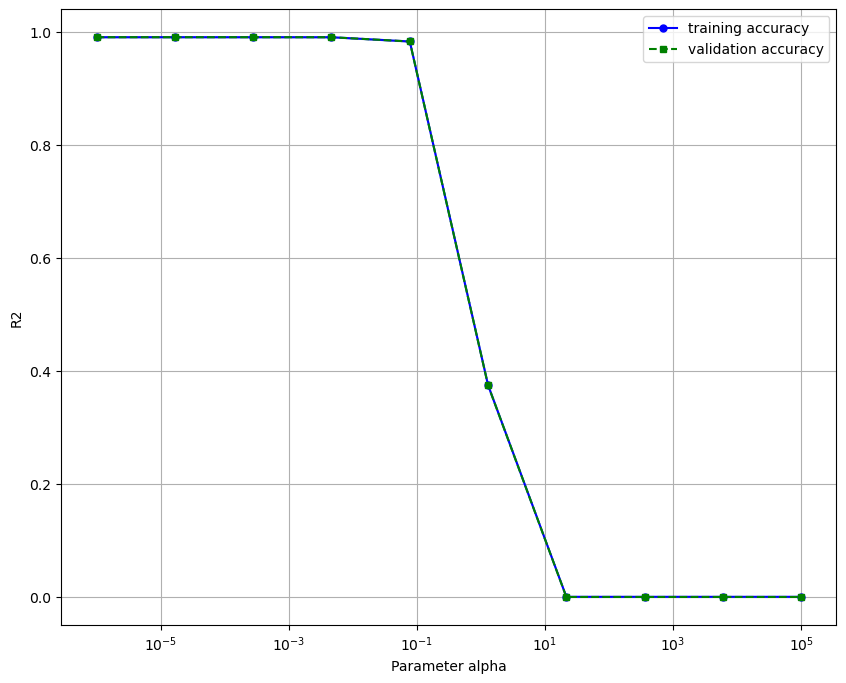

In [26]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean_elastic,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_elastic + train_std_elastic,
                 train_mean_elastic - train_std_elastic, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_elastic,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean_elastic + test_std_elastic,
                 test_mean_elastic - test_std_elastic,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')

plt.show()

For ElasticNet i set $\alpha$ =$10^{-3}$ 

In [27]:
elastic_model = ElasticNet(alpha=0.00001)
elastic_model.fit(X_train,y_train)

elastic_model.coef_

array([-0.02932601,  0.97732968,  0.0578932 , -0.00422691,  0.00374754,
       -0.00267192])

Since there is no **multicolineariy**, `Ridge` and `Lasso` and `Elastic` net are very similar to `Linear Regression`.

# 7. Evaluation

In [28]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [29]:
lr_scores = cross_val_score(lr,X_train,y_train,cv=5,scoring="r2")

print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean()*100, lr_scores.std() * 200))

Accuracy: 99.02 (+/- 0.02)


In [30]:
ransac_scores = cross_val_score(ransac,X_train,y_train,cv=5,scoring="r2")

print("Accuracy: %0.2f (+/- %0.2f)" % (ransac_scores.mean()*100, ransac_scores.std() * 200))

Accuracy: 95.45 (+/- 5.83)


In [31]:
ridge_scores = cross_val_score(ridge_model,X_train,y_train,cv=5,scoring="r2")

print("Accuracy: %0.2f (+/- %0.2f)" % (ridge_scores.mean()*100, ridge_scores.std() * 200))

Accuracy: 99.02 (+/- 0.02)


In [32]:
lasso_scores = cross_val_score(lasso_model,X_train,y_train,cv=5,scoring="r2")

print("Accuracy: %0.2f (+/- %0.2f)" % (lasso_scores.mean()*100, lasso_scores.std() * 200))

Accuracy: 99.02 (+/- 0.02)


In [33]:
elastic_model_scores = cross_val_score(elastic_model,X_train,y_train,cv=5,scoring="r2")

print("Accuracy: %0.2f (+/- %0.2f)" % (elastic_model_scores.mean()*100, elastic_model_scores.std() * 200))

Accuracy: 99.02 (+/- 0.02)




Now i want to evaluate them with unseen data:

In [34]:
print("Linear Regresssion R2 Score for test data:",r2_score(lr.predict(X_test),y_test))

Linear Regresssion R2 Score for test data: 0.9900663392146067


In [35]:
print("RANSAC regression R2 Score for test data:",r2_score(ransac.predict(X_test),y_test))

RANSAC regression R2 Score for test data: 0.9899005590638953


In [36]:
print("Ridge Regresssion R2 Score for test data:",r2_score(ridge_model.predict(X_test),y_test))

Ridge Regresssion R2 Score for test data: 0.9900641211190471


In [37]:
print("Lasso Regresssion R2 Score for test data:",r2_score(lasso_model.predict(X_test),y_test))

Lasso Regresssion R2 Score for test data: 0.990066185848551


In [38]:
print("Elastic Net Regresssion R2 Score for test data:",r2_score(elastic_model.predict(X_test),y_test))

Elastic Net Regresssion R2 Score for test data: 0.9900661856991267
